# 머신러닝 지도학습

## 1) LinearRegression

In [1]:
#sklearn.linear_model.LinearRegression(fit_intercept=True, normalizer='deprecated', copy_X=True, n_jobs= None, positive=False)

#fit_intercept: Falseaus 절편을 사용하지 않는 모델
#normalize: True인 경우 X는 평균을 빼고 L2-norm으로 나누어 회귀 전에 정규화된다. False인 경우 정규화 x
#copy_X= True이면 X가 복사
#n_jobs: 계산 작업 횟수
#positive: True이면 계수가 양수

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('./data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


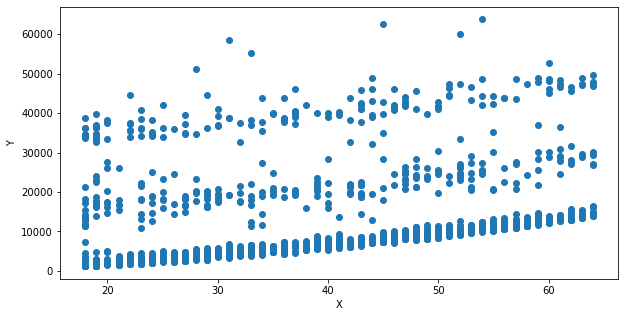

In [3]:
x = data['age']
y = data['charges']

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
x.min()

18

In [6]:
# 학습시키기 전 데이터를 2차원 array 형태로 바꿔주기위해 reshape 한다
x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(1338,1)
y = y.reshape(1338,1)
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [7]:
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, "계수", lr.coef_)

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [8]:
print(lr.score(x,y))

0.08940589967885804


In [6]:
x_new=[[19],[64]]
y_hat = lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


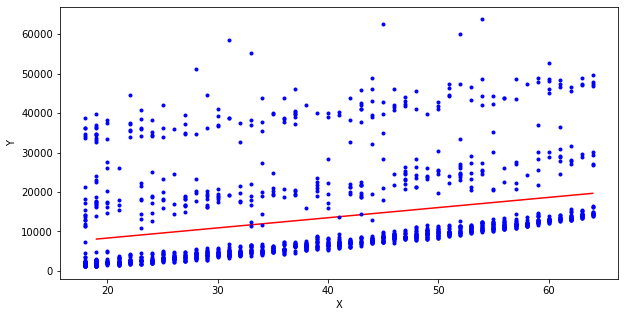

In [7]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, "-r")
plt.plot(x,y,"b.")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 2) 다항회귀





In [10]:
# 다항변수 생성
### PolynomialFeaturers(degree=d)를 활용해 변수 특성을 거듭제곱으로 변환, 과적합 주의!!
# 선형결합
### PolynomialFeaturers로 생성산 변수들을 LinearRegression입력값으로 대입하면 다항 회귀분석 진행

In [ ]:
## calss sklearn.preprocessing.PolynomialFeatuers(degree-2,interaction_only=False, include_bias=True, order='C')
# degree: 다항식의 차수를 결정
# interaction_only: 교차항을 추가할지 결정,  True인 경우 교차항만 생성, False인 경우 교차항과 함께 제곱 이상인 항도 추가
# include_bias: bias컬럼을 추가하맂 결정

In [15]:
cereal = pd.read_csv("cereal.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [16]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [17]:
# 필요한 변수만 추출(name, mfr, type 변수 제외 또한 sugars>0 이상인 데이터만 추출)
cereal = cereal.iloc[:,3:]

In [21]:
cereal = cereal.query("sugars>=0")

In [23]:
# 시리얼의 설탕 함유량(X)에 따른 영양등급평가(y)를 다항 회귀분석으로 예측
# sugars와 rating 변수를 추출한 뒤, sugars를 기준으로 정렬 후 산점도 
cereal2 = cereal[['sugars','rating']]
cereal2.sort_values(by=['sugars'],inplace=True)
cereal2.reset_index(drop=True, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23908\101367499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'],inplace=True)


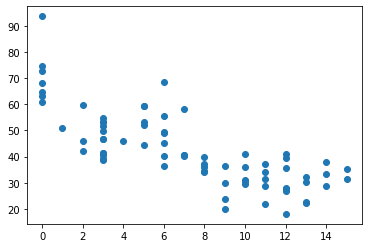

In [26]:
x = cereal2['sugars'].values
y= cereal2['rating'].values
plt.scatter(x,y)
plt.show()

In [29]:
# sugars를 설명변수로 rating을 타깃변수로 설정한 후 7:3비율로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [30]:
X_train.reshape(-1,1)

array([[11],
       [ 6],
       [10],
       [ 6],
       [12],
       [ 7],
       [ 3],
       [13],
       [ 0],
       [11],
       [ 9],
       [12],
       [ 8],
       [ 4],
       [ 2],
       [ 3],
       [ 0],
       [13],
       [ 9],
       [ 1],
       [14],
       [10],
       [ 3],
       [ 3],
       [ 6],
       [ 6],
       [ 9],
       [ 8],
       [10],
       [ 3],
       [ 0],
       [12],
       [ 3],
       [ 5],
       [ 5],
       [ 8],
       [ 3],
       [13],
       [ 3],
       [15],
       [12],
       [ 3],
       [10],
       [ 5],
       [ 0],
       [ 0],
       [ 3],
       [12],
       [ 0],
       [ 2],
       [14],
       [ 3],
       [ 7]], dtype=int64)

array([37.136863, 45.328074, 36.176196, 36.523683, 28.025765, 40.69232 ,
       41.50354 , 22.396513, 93.704912, 34.139765, 23.804043, 18.042851,
       37.038562, 45.811716, 41.998933, 51.592193, 64.533816, 30.313351,
       36.471512, 50.764999, 28.592785, 40.917047, 53.371007, 54.850917,
       68.402973, 40.105965, 19.823573, 39.7034  , 30.450843, 40.560159,
       68.235885, 26.734515, 39.106174, 53.313813, 59.425505, 36.187559,
       46.895644, 32.207582, 41.445019, 35.252444, 41.015492, 38.839746,
       29.509541, 59.363993, 72.801787, 60.756112, 39.241114, 35.782791,
       74.472949, 45.863324, 33.174094, 49.787445, 58.345141])

In [36]:
# PolynomialFeatures로 2차 다항식 조건을 생성한 뒤 fit_transform 매서드로 X_ploy 생성
# 생성후 LinearRegression으로 회귀 모델을 불러온다.
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [39]:
X_test.reshape(-1.1)

TypeError: 'float' object cannot be interpreted as an integer

In [42]:
# 예측
import numpy as np
X_test_poly = poly_reg.transform(X_test.reshape(-1,1))
pred = reg.predict(X_test_poly)

In [45]:
np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1),y_test.reshape(len(y_test),1)),1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [46]:
y_test

array([46.66, 28.74, 59.64, 37.84, 31.44, 44.33, 40.4 , 55.33, 49.12,
       27.75, 34.38, 29.92, 63.01, 31.07, 52.08, 40.45, 53.13, 33.98,
       49.51, 22.74, 39.26, 31.23, 21.87])

In [47]:
pred

array([51.63, 32.1 , 55.79, 31.08, 32.1 , 44.46, 38.82, 41.45, 41.45,
       31.38, 36.56, 34.7 , 65.25, 33.21, 44.46, 38.82, 51.63, 36.56,
       41.45, 31.04, 31.38, 31.5 , 32.1 ])

In [51]:
reg.score(poly_reg.transform(X_test.reshape(-1,1)),y_test)

0.7437569749767214

In [58]:
# 성능평가 지표를 통해 모델의 예측력 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test,pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)),y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}'.format(round(acc,3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	0.744


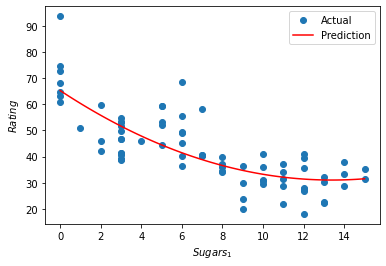

In [62]:
# 결과 시각화
X_new = np.linspace(0,15,100).reshape(100,1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x,y,'o',label='Actual')
plt.plot(X_new,y_new,'r-', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

In [64]:
cereal

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [72]:
cereal = pd.read_csv("cereal.csv")
cereal = cereal.iloc[:,3:]

In [73]:
# 설명 변수 12개의 데이터로 설정하여 머신러닝 수행
X = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(53, 12) (24, 12)
(53,) (24,)


In [76]:
# 스케일링, 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 다항변수 생성
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

# 모델학습
reg = LinearRegression()
reg.fit(X_poly,y_train)

LinearRegression()

In [77]:
# 모델 적용 및 평가
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test,pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test),y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}'.format(round(acc,3)))

MSE	15.514
MAE	2.521
RMSE	3.939
ACC	0.886


## 3) 다중회귀

In [80]:
# 코드 실습데이터: 당뇨 데이터

from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
x= pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target

In [100]:
# a 값에 따라 다르게 설정되는 릿지 회귀계수를 데이터프레임(df_ridge)에 저장
from sklearn.linear_model import Ridge

alpha = np.logspace(-3,1,5)
data=[]

for i,a in enumerate(alpha):
    ridge = Ridge(alpha=a)
    ridge.fit(x,y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge=pd.DataFrame(data, index=alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


In [103]:
# a 값에 따라 다르게 설정되는 라쏘 회귀계수를 데이터프레임(df_lasso)에 저장

from sklearn.linear_model import Lasso

alpha = np.logspace(-3,1,5)
data=[]

for i,a in enumerate(alpha):
    lasso = Lasso(alpha=a)
    lasso.fit(x,y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso=pd.DataFrame(data, index=alpha)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [106]:
# a 값에 따라 다르게 설정되는 엘라스틱넷 회귀계수를 데이터프레임(df_lasso)에 저장

from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3,1,5)
data=[]

for i,a in enumerate(alpha):
    ela = ElasticNet(alpha=a, l1_ratio=0.5)
    ela.fit(x,y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela=pd.DataFrame(data, index=alpha)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


## 4)로지스틱 회귀

In [110]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body= pd.read_csv('bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [111]:
# gender 변수 binary로 변경 남자이면 0, 여자이면 1, class의 경우 A인 경우 1, 아닌경우 0으로 전처리

body['gender'] = np.where(body['gender']=='M',0,1)
body['class_1']= np.where(body['class']=='A', 1,0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [117]:

feature_columns = list(body.columns.difference(['class','class_1']))
x=body[feature_columns]


,age,body fat_%,broad jump_cm,diastolic,gender,gripForce,height_cm,sit and bend forward_cm,sit-ups counts,systolic,weight_kg
0,27.0,21.3,217.0,80.0,0,54.9,172.3,18.4,60.0,130.0,75.24
1,25.0,15.7,229.0,77.0,0,36.4,165.0,16.3,53.0,126.0,55.80
2,31.0,20.1,181.0,92.0,0,44.8,179.6,12.0,49.0,152.0,78.00
3,32.0,18.4,219.0,76.0,0,41.4,174.5,15.2,53.0,147.0,71.10
4,28.0,17.1,217.0,70.0,0,43.5,173.8,27.1,45.0,127.0,67.70
...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,16.2,198.0,74.0,0,35.8,172.1,17.4,47.0,141.0,71.80
13389,21.0,12.1,167.0,74.0,0,33.0,179.7,1.1,48.0,128.0,63.90
13390,39.0,20.1,229.0,78.0,0,63.5,177.2,16.4,45.0,132.0,80.50
13391,64.0,40.4,75.0,68.0,1,19.3,146.1,9.2,0.0,121.0,57.70


In [119]:
# 학습데이터와 평가데이터로 데이터 분류
from sklearn.model_selection import train_test_split


feature_columns = list(body.columns.difference(['class','class_1']))
x=body[feature_columns]
y=body['class_1']

X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,train_size=0.7, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(9375, 11) (4018, 11)
(9375,) (4018,)


In [122]:
# 데이터 학습

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [124]:
proba = pd.DataFrame(lr.predict_proba(X_train))
cs = lr.decision_function(X_train)

df = pd.concat([proba,pd.DataFrame(cs)],axis=1)
df.columns=['Not A',"A","decision_function"]

df.sort_values(['decision_function'],inplace=True)
df.reset_index(inplace=True, drop=True)

df

,Not A,A,decision_function
0,1.000000,1.202409e-08,-18.236353
1,1.000000,5.241303e-08,-16.764110
2,1.000000,6.521518e-08,-16.545574
3,1.000000,7.509982e-08,-16.404448
4,1.000000,1.028565e-07,-16.089931
...,...,...,...
9370,0.001825,9.981749e-01,6.304300
9371,0.001800,9.981998e-01,6.318036
9372,0.001750,9.982503e-01,6.346584
9373,0.000781,9.992193e-01,7.154492


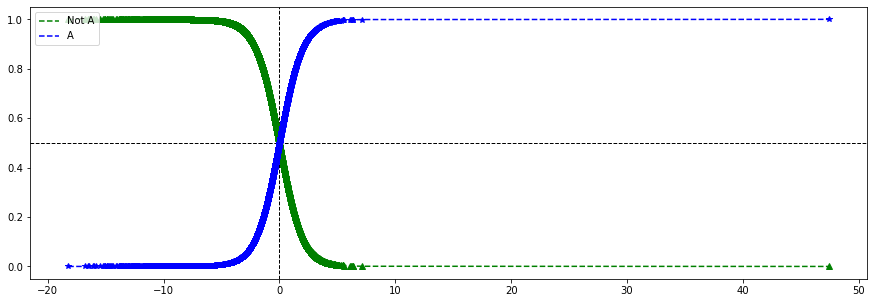

In [125]:
# 시각화

plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'],df['Not A'], 'g--', label= 'Not A')
plt.plot(df['decision_function'],df['Not A'], 'g^')
plt.plot(df['decision_function'],df['A'], 'b--', label= 'A')
plt.plot(df['decision_function'],df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')

plt.show()

In [130]:
# 성능평가

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred= lr.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test,pred)
test_prc = precision_score(y_test,pred)
test_recall = recall_score(y_test,pred)
test_f1 = f1_score(y_test,pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100),2))
print('정밀도\t{}%'.format(round(test_prc*100),2))
print('재현율\t{}%'.format(round(test_recall*100),2))
print('F1\t{}%'.format(round(test_f1*100),2))

[[2754  260]
 [ 339  665]]


정확도	85%
정밀도	72%
재현율	66%
F1	69%


In [138]:
pr = lr.predict_proba(X_test)

In [137]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, pred))

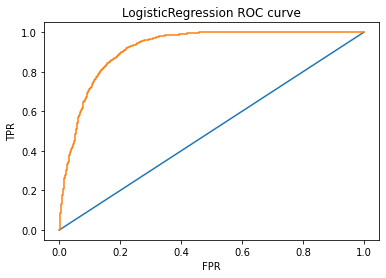

In [147]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pr[:,1])
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, label='lr')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LogisticRegression ROC curve')
plt.show()

## 6) 다중분류 - softmax

In [151]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
body = pd.read_csv('bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [154]:
# 데이터 전처리 gender 남:0 여:1 , class A:0, B:1, C:2, D:3
body['gender'] = np.where(body['gender']=='M', 0,1)
mapping={'A':0,'B':1,'C':2,'D':4}
body['class_2']=body['class'].map(mapping)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,4
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,4


In [155]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class','class_2']))
x=body[feature_columns]
y=body['class_2']

X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(9375, 11) (4018, 11)
(9375,) (4018,)


In [157]:
from sklearn.linear_model import LogisticRegression

softlr = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=10)
softlr.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

In [160]:
from sklearn.metrics import confusion_matrix,accuracy_score

pred = softlr.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test,pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))

[[713 254  37   0]
 [274 397 301  32]
 [ 97 203 524 181]
 [ 13  64 158 770]]


정확도	59.83%


In [161]:
softlr.predict([X_test.iloc[-1,:]])

array([0], dtype=int64)

In [164]:
softlr.predict_proba([X_test.iloc[-1,:]])

array([[0.63, 0.3 , 0.06, 0.  ]])

## 7) SVM

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('train.csv')

타이타닉 호 침몰 당시의 승객 명단 데이터
- Survived: 생존 여부 => 0 = No, 1 = Yes
- pclass: 티켓 등급 => 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex: 성별
- Age: 나이
- Sibsp: 함께 탑승한 형제자매, 배우자의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓 번호
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 항구 => C = Cherbourg, Q = Queenstown, S = Southampton

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# train 데이터에서 사용할 열 가져오기
train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [69]:
# train데이터 Age결측치 평균으로 채우기
train['Age'] = train['Age'].fillna(round(train['Age'].mean(),0))

In [70]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,30.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [71]:
import numpy as np
# gender 변수 남자 1 여자 0로 변경
train['Sex'] = np.where(train['Sex']=='male',1,0)

In [72]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,30.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


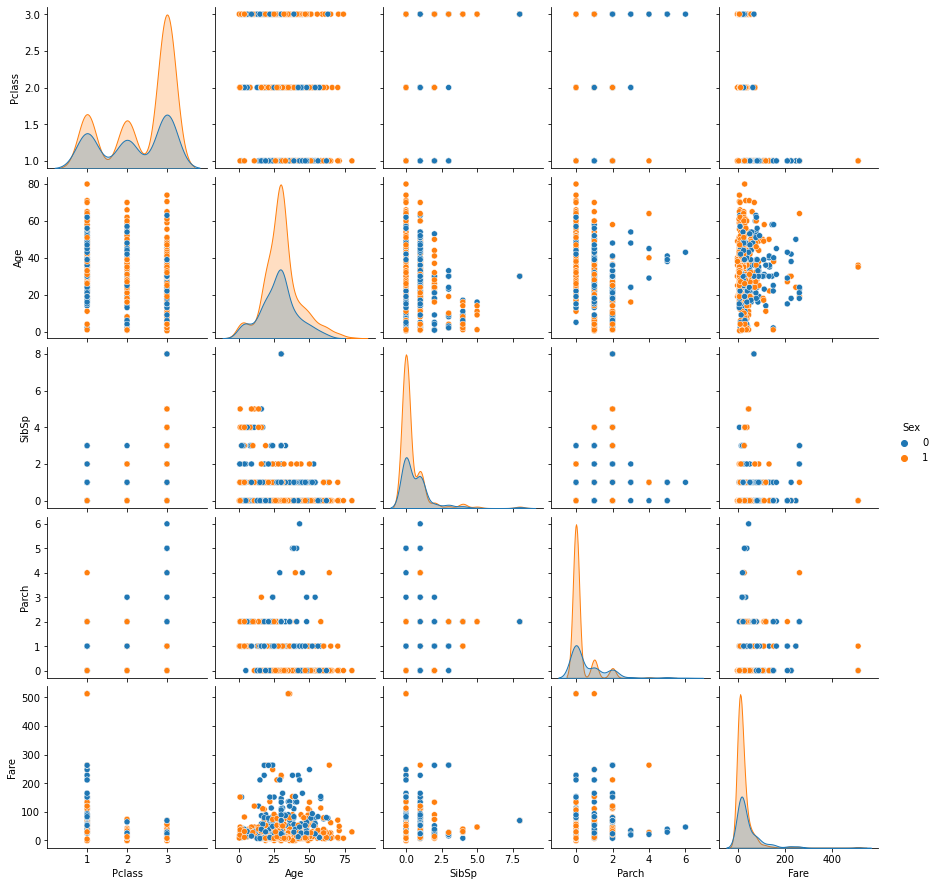

In [73]:
# 데이터의 클래스 분포 시각화
sns.pairplot(hue='Sex', data=train)

In [74]:
# 데이터 학습
from sklearn.model_selection import train_test_split

feature_columns = list(train.columns.difference(['Sex']))
x = train[feature_columns]
y = train['Sex']

X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(623, 5) (268, 5)
(623,) (268,)


In [75]:
# 스케일링

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)


In [76]:
# 모델 생성 및 데이터 학습
from sklearn.svm import SVC

sv = SVC(C=0.5)
sv.fit(X_train,y_train)

SVC(C=0.5)

In [80]:
# test 데이터 스케일링 후 모델평가

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X_test_sc = scaler.transform(X_test)

pred = sv.predict(X_test_sc)

In [81]:
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)
test_f1 = f1_score(y_test,pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100),2))
print('정밀도\t{}%'.format(round(test_prc*100),2))
print('재현율\t{}%'.format(round(test_recall*100),2))
print('F1\t{}%'.format(round(test_f1*100),2))

[[ 33  61]
 [ 25 149]]


정확도	68%
정밀도	71%
재현율	86%
F1	78%


## 8) SVR

In [83]:
import numpy as np

# 샘플데이터 생성하기

x = np.sort(5*np.random.rand(40,1),axis=0)
y = np.sin(x).ravel()

print(x[0:6],'\n\n', y[0:10])

[[0.24602002]
 [0.35610209]
 [0.48610518]
 [0.52596802]
 [0.62934775]
 [0.82978551]] 

 [0.24354576 0.34862352 0.4671858  0.50205042 0.5886176  0.7377866
 0.98215468 0.98510851 0.99394975 0.9899216 ]


In [86]:
# 타깃데이터에 노이즈 추가하기
y[::5] += 3 *(0.5-np.random.rand(8))

print(y[0:10])

[1.10008946 0.34862352 0.4671858  0.50205042 0.5886176  1.1785541
 0.98215468 0.98510851 0.99394975 0.9899216 ]


In [90]:
from sklearn.svm import SVR

# 회귀 모델 적합시키기

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(x,y)
svr_lin.fit(x,y)
svr_poly.fit(x,y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [103]:
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)


from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [rbf_pred, lin_pred, poly_pred]
kernel = [ 'Random_Forest', 'Linear', ' Polynomial']
evls= ['mse','rmse','mae']

results = pd.DataFrame(index=kernel, columns=evls)

for pred, nm in zip(preds,kernel):
    mse = mean_squared_error(y,pred)
    mae = mean_absolute_error(y,pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']= round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)

results

,mse,rmse,mae
Random_Forest,0.15,0.39,0.22
Linear,0.31,0.55,0.37
Polynomial,0.16,0.4,0.21


## KNN

In [110]:
import pandas as pd

liver = pd.read_csv('./data/indian_liver_patient.csv')
print(liver.Dataset.unique())
liver.head()

[1 2]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [111]:
# gender 변수 변환 Female:0 , male = 1
import numpy as np
liver['Gender'] = np.where(liver['Gender']=='Female',0,1)
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [114]:
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [117]:
# 결측치가 4개로 갯수가 적으므로 삭제를 진행
liver.dropna(axis=0,inplace = True)
liver.isna().sum()


(579, 11)


In [118]:
# 학습, 평가 데이터로 나누기 
from sklearn.model_selection import train_test_split

x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y, train_size = 0.7, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(405, 10) (174, 10)
(405,) (174,)


In [119]:
# 스케일링

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

In [122]:
# 모델학습

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=15)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X_test_sc = scaler.transform(X_test)

pred = knn.predict(X_test_sc)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)
test_f1 = f1_score(y_test,pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_recall*100,2)))

[[124   0]
 [ 50   0]]


정확도	71.26%
정밀도	71.26%
재현율	100.0%


In [127]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)
test_f1 = f1_score(y_test,pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_recall*100,2)))

[[106  18]
 [ 39  11]]


정확도	67.24%
정밀도	73.1%
재현율	85.48%


## KneighborsRegressor

In [131]:
# 데이터 생성

import numpy as pd

np.random.seed(0)
X=np.sort(5*np.random.rand(400,1),axis=0)
T = np.linspace(0,5,500)[:,np.newaxis]
y= np.sin(X).ravel()

print(X[:10])
print(T[:10])
print(y[:10])

[[0.02347738]
 [0.05713729]
 [0.05857042]
 [0.06618429]
 [0.08164251]
 [0.08214815]
 [0.09260897]
 [0.093949  ]
 [0.09596599]
 [0.10053773]]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]
 [0.0501002 ]
 [0.06012024]
 [0.07014028]
 [0.08016032]
 [0.09018036]]
[0.02347522 0.05710621 0.05853694 0.06613598 0.08155185 0.08205579
 0.09247665 0.09381086 0.09581876 0.10036845]


In [133]:
# 타깃데이터에 노이즈 추가하기
y[::1] += 1*(0.5 - np.random.rand(400))

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(280, 1) (120, 1)
(280,) (120,)


In [138]:
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(X_train, y_train)
knn_dis.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [142]:
uni_pred = knn_uni.predict(X_test)
dis_pred = knn_dis.predict(X_test)


from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
preds = [uni_pred,dis_pred]
weights = ['uni_pred', 'distance']
evls= ['mse','rmse','mae']

results = pd.DataFrame(index=weights, columns=evls)

for pred, nm in zip(preds,weights):
    mse = mean_squared_error(y_test,pred)
    mae = mean_absolute_error(y_test,pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']= round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)


In [143]:
results

,mse,rmse,mae
uni_pred,0.1,0.31,0.27
distance,0.11,0.34,0.28


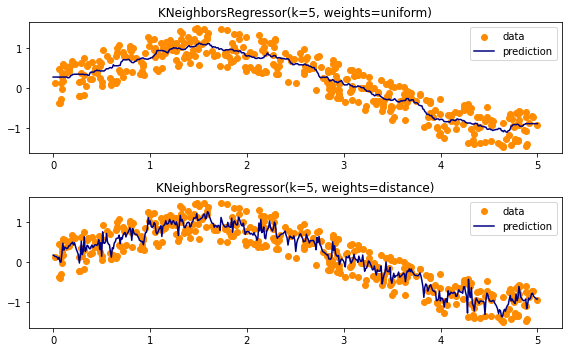

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for i, weights in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(X,y).predict(T)
    
    plt.subplot(2,1,i+1)
    plt.scatter(X,y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor(k=%i, weights=%s)"%(5,weights))
    
plt.tight_layout()
plt.show()

## 의사결정나무


In [20]:
import pandas as pd

credit = pd.read_csv('./data/german.csv', delimiter=';')

credit.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [21]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [22]:
# 학습데이터와 평가데이터 나누기

feature_columns = list(credit.columns.difference(['Creditability']))
X = credit[feature_columns]
y = credit['Creditability']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.7, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(700, 20) (300, 20)
(700,) (300,)


In [23]:
X_train

,Account_Balance,Age_years,Concurrent_Credits,Credit_Amount,Duration_in_Current_address,Duration_of_Credit_monthly,Foreign_Worker,Guarantors,Instalment_per_cent,Length_of_current_employment,Most_valuable_available_asset,No_of_Credits_at_this_Bank,No_of_dependents,Occupation,Payment_Status_of_Previous_Credit,Purpose,Sex_Marital_Status,Telephone,Type_of_apartment,Value_Savings_Stocks
887,1,25,3,8065,2,36,1,1,3,3,4,2,1,4,4,6,2,2,2,1
824,1,29,3,1659,2,24,1,1,4,2,3,1,1,2,3,3,2,2,1,1
176,4,27,3,4139,3,24,1,1,3,3,2,2,1,2,4,9,3,2,2,2
252,4,38,3,804,4,12,1,1,4,5,3,1,1,3,2,3,3,1,2,1
600,1,26,3,8229,2,36,1,1,2,3,2,1,2,3,2,1,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,4,32,3,4686,2,36,1,1,2,3,4,1,1,4,2,1,3,2,3,1
450,2,66,3,766,3,12,1,1,4,3,1,1,1,2,2,3,3,1,2,3
653,4,53,3,2424,4,24,1,1,4,5,2,2,1,3,4,3,3,1,2,5
761,1,65,3,2600,4,18,1,1,4,3,4,2,1,3,2,3,3,1,3,1


In [24]:
# 의사결정나무 모델 생성 및 학습

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [25]:
credit

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [26]:
X

,Account_Balance,Age_years,Concurrent_Credits,Credit_Amount,Duration_in_Current_address,Duration_of_Credit_monthly,Foreign_Worker,Guarantors,Instalment_per_cent,Length_of_current_employment,Most_valuable_available_asset,No_of_Credits_at_this_Bank,No_of_dependents,Occupation,Payment_Status_of_Previous_Credit,Purpose,Sex_Marital_Status,Telephone,Type_of_apartment,Value_Savings_Stocks
0,1,21,3,1049,4,18,1,1,4,2,2,1,1,3,4,2,2,1,1,1
1,1,36,3,2799,2,9,1,1,2,3,1,2,2,3,4,0,3,1,1,1
2,2,23,3,841,4,12,1,1,2,4,1,1,1,2,2,9,2,1,1,2
3,1,39,3,2122,2,12,2,1,3,3,1,2,2,2,4,0,3,1,1,1
4,1,38,1,2171,4,12,2,1,4,3,2,2,1,2,4,0,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,21,3,1987,4,24,1,1,2,3,1,1,2,2,2,3,3,1,1,1
996,1,45,3,2303,1,24,1,2,4,5,1,1,1,3,2,0,3,1,2,1
997,4,30,3,12680,4,21,1,1,4,5,4,1,1,4,4,0,3,2,3,5
998,2,52,3,6468,1,12,1,1,2,1,4,1,1,4,2,3,3,2,2,5


In [27]:
# 모델평가

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = dt.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('f1\t{}%'.format(round(test_f1*100,2)))

[[ 31  59]
 [ 37 173]]


정확도	68.0%
정밀도	74.57%
재현율	82.38%
f1	78.28%


In [28]:
# classification_report를 통해 결정트리의 분석결과

from sklearn.metrics import classification_report

report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.46      0.34      0.39        90
           1       0.75      0.82      0.78       210

    accuracy                           0.68       300
   macro avg       0.60      0.58      0.59       300
weighted avg       0.66      0.68      0.67       300



In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [45]:
pr = dt.predict_proba(X_test)

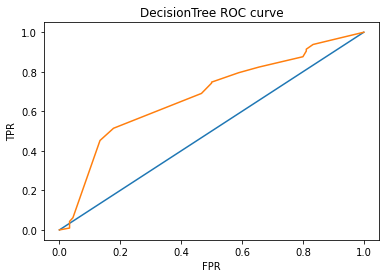

Roc_Auc_score:  0.6802910052910053


In [46]:
fpr, tpr, thresholds = roc_curve(y_test, pr[:,1])
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, label='dt')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DecisionTree ROC curve')
plt.show()
print('Roc_Auc_score: ', roc_auc_score(y_test, pr[:,1]))

In [55]:
# 변수중요도 확인

importance = dt.feature_importances_
columns_nm = pd.DataFrame(X.columns)
feature_importance = pd.concat([columns_nm,pd.DataFrame(importance)],axis=1)

feature_importance.columns = ['feature_nm', 'importances']

feature_importance

,feature_nm,importances
0,Account_Balance,0.270910
1,Age_years,0.089328
2,Concurrent_Credits,0.036190
3,Credit_Amount,0.146285
4,Duration_in_Current_address,0.020651
5,Duration_of_Credit_monthly,0.185133
6,Foreign_Worker,0.000000
7,Guarantors,0.000000
8,Instalment_per_cent,0.011616
9,Length_of_current_employment,0.000000


In [63]:
# 결정트리 분류 의사결정 시각화
# 패키지 설치 필요
#import numpy as np
#feature_names = feature_columns
#target_names = np.array(['0','1'])

#import pydot
#import pydotplus
#import graphviz
#from sklearn.tree import export_graphviz
#dt_dot_data = export_graphviz(dt, featuer_names = feature_names,
#                             class_names = target_names,
#                             filled=Ture, rounded=True,
#                            special_characters=True)
#dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

#from IPython.dispaly import Image
#Image(dt_graph.create_png())

## DecisionTreeRegrassor

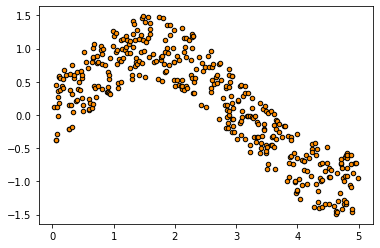

In [65]:
# 임의의 데이터 생성
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

np.random.seed(0)
X=np.sort(5 * np.random.rand(400,1),axis=0)
T=np.linspace(0,5,500)[:,np.newaxis]
y=np.sin(X).ravel()

# 노이즈 추가하기
y[::1] += 1*(0.5 - np.random.rand(400))
plt.scatter(X,y, s= 20, edgecolor = 'black', c ='darkorange', label='data')

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(280, 1) (120, 1)
(280,) (120,)


In [67]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

y_1 = regr_1.fit(X_train, y_train).predict(X_test)
y_2 = regr_2.fit(X_train,y_train).predict(X_test)
preds=[y_1,y_2]
weights = ['max_depth = 2', 'max_depth = 5']
evls= ['mse','rmse','mae']
results = pd.DataFrame(index=weights, columns=evls)

for pred, nm in zip(preds, weights):
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test,pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']= round(mse,2)
    results.loc[nm]['rmse'] = round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)
    
results

,mse,rmse,mae
max_depth = 2,0.12,0.35,0.29
max_depth = 5,0.12,0.35,0.3


## 앙상블

## BaggingClassifier

In [22]:
import pandas as pd
breast = pd.read_csv('./data/breast-cancer.csv')
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
# M악성, B음성
breast.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

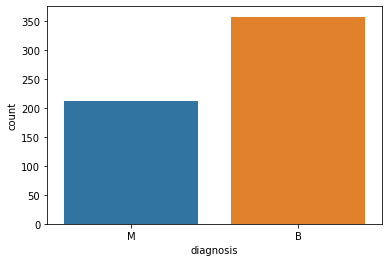

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(x='diagnosis', data = breast)

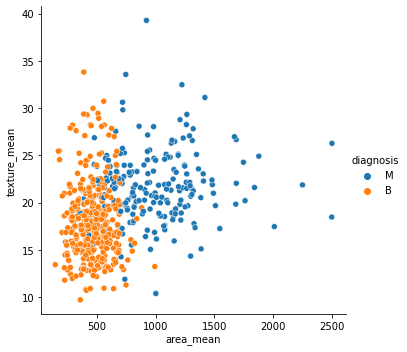

In [25]:
# 설명변수 area_mean, texture_mean, 타깃변수 diagnosis로 관계 시각화
sns.relplot(x='area_mean',y='texture_mean', hue='diagnosis',data=breast)

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

# M:1, B=0으로 변환
breast['diagnosis'] = np.where(breast['diagnosis']=='M',1,0)
features = ['area_mean','area_worst']
X = breast[features]
y= breast['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.7, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator = DecisionTreeClassifier())
pred = clf.fit(X_train, y_train).predict(X_test)
print('Accuracy_score: ', clf.score(X_test, pred))

Accuracy_score:  1.0


C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [28]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pred),
            index =['Ture[0]', 'True[1]'],
            columns=['Pred[0]','Pred[1]'])

,Pred[0],Pred[1]
Ture[0],102,5
True[1],9,55


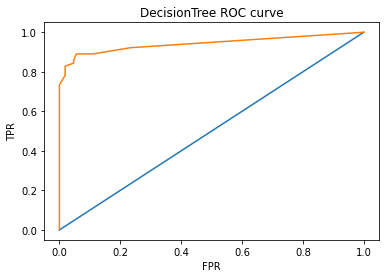

Roc_Auc_score:  0.9422459112149533


In [31]:
# ROC_AUC 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

pr= clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pr[:,1])
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, label='dt')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DecisionTree ROC curve')
plt.show()
print('Roc_Auc_score: ', roc_auc_score(y_test, pr[:,1]))

In [32]:
# oob_score를 통한 평가
clf_oob = BaggingClassifier(base_estimator = DecisionTreeClassifier(), oob_score=True)
oob= clf_oob.fit(X,y).oob_score_
print(oob)

0.9068541300527241


C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_bagging.py:797: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


## BaggingRegressor

In [34]:
import pandas as pd
car = pd.read_csv('./data/CarPrice_Assignment.csv')
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [35]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [37]:
# 연속형 변수들을 설명변수 price를 타깃변수로 설정
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling','price']))

X= car_num[features]
y= car_num['price']
print(X.shape, y.shape)

(205, 13) (205,)


In [40]:
# 베깅회귀모델 생성

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),oob_score=True)

reg=reg.fit(X,y)
reg.oob_score_

C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_bagging.py:1255: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


0.8852190096813062

## 부스팅

In [42]:
breast = pd.read_csv('./data/breast-cancer.csv')

breast['diagnosis'] = np.where(breast['diagnosis']=='M',1,0)
features= ['area_mean','texture_mean']
X=breast[features]
y=breast['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, stratify=y, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [44]:
# AdaBoostClassifier 모델 생성 및 학습

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
pred = clf.fit(X_train,y_train).predict(X_test)
print('정확도: ', clf.score(X_test, y_test))

정확도:  0.9122807017543859


In [45]:
# 모델평가

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('f1\t{}%'.format(round(test_f1*100,2)))

[[102   5]
 [ 10  54]]


정확도	91.23%
정밀도	91.53%
재현율	84.38%
f1	87.8%


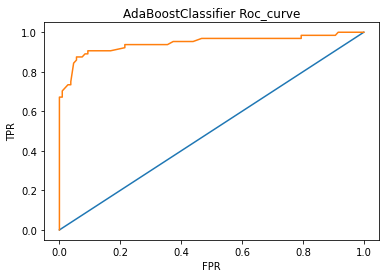

Roc_Auc_score:  0.9444363317757009


In [46]:
# ROC_AUC 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

pr= clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pr[:,1])
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, label='dt')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AdaBoostClassifier Roc_curve')
plt.show()
print('Roc_Auc_score: ', roc_auc_score(y_test, pr[:,1]))

In [49]:
# 변수중요도 
importance = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean','texture_mean'])
feature_importance = pd.concat([column_nm,pd.DataFrame(importance)],
                               axis=1)

feature_importance.columns = ['feature_nm','importances']
feature_importance

,feature_nm,importances
0,area_mean,0.56
1,texture_mean,0.44


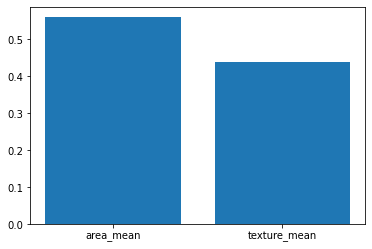

In [61]:
plt.bar(features, feature_importance.importances)
plt.show()

## AdaBoostRegressor

In [62]:
car = pd.read_csv('./data/CarPrice_Assignment.csv')
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling','price']))

X=car_num[features]
y= car_num['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(143, 13) (62, 13)
(143,) (62,)


In [65]:
from sklearn.ensemble import AdaBoostRegressor

reg= AdaBoostRegressor()
pred= reg.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = np.sqrt(mse)
acc= reg.score(X_test, y_test)

print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc*100,3)))

MSE	6396257.516
MAE	1923.81
RMSE	2529.082
ACC	89.405%


In [72]:
# 변수중요도 
importance = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importance = pd.concat([column_nm,pd.DataFrame(importance)],
                               axis=1)

feature_importance.columns = ['feature_nm','importances']
feature_importance.sort_values(by='importances',ascending=False)

,feature_nm,importances
7,enginesize,0.621220
6,curbweight,0.107174
9,horsepower,0.075660
3,carwidth,0.048207
8,highwaympg,0.046143
12,wheelbase,0.035532
0,boreratio,0.020622
4,citympg,0.013331
2,carlength,0.010811
10,peakrpm,0.009109


In [76]:
n_features = X_train.shape[1]
importances = reg.feature_importances_
columns_nm = features

plt.barh()

In [80]:
reg.feature_importances_

0.0009597488203878686

In [90]:
list(range(n_features))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

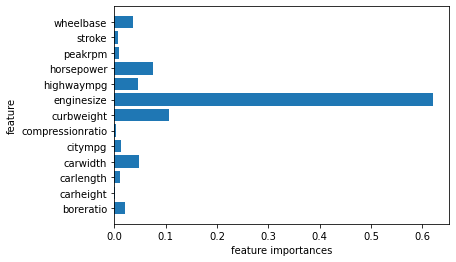

In [89]:
plt.barh(features,feature_importance.importances,  height=0.8, align = 'center')
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1,n_features)
plt.show()

## RandomForesClassifier

In [1]:
import pandas as pd
breast = pd.read_csv('./data/breast-cancer.csv')

import numpy as np
from sklearn.model_selection import train_test_split
breast['diagnosis'] = np.where(breast['diagnosis']=='M',1,0)
features = ['area_mean','texture_mean']
X = breast[features]
y = breast['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.7, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [3]:
# 모델 생성 및 학습

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
pred = clf.fit(X_train,y_train).predict(X_test)
print('정확도: ', clf.score(X_test,y_test))

정확도:  0.9005847953216374


In [4]:
# 모델 성능평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test,pred)
test_prc = precision_score(y_test,pred)
test_rcll = recall_score(y_test,pred)
test_f1 = f1_score(y_test,pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))

[[102   5]
 [ 12  52]]


정확도	90.06%
정밀도	91.23%
재현율	81.25%


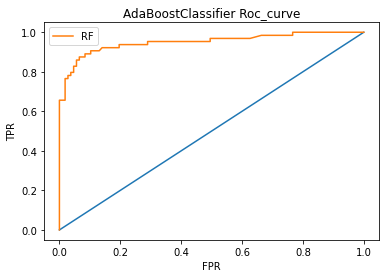

Roc_Auc_score:  0.9502774532710281


In [11]:
# ROC_AUC 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

pr= clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pr[:,1])
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, label='RF')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AdaBoostClassifier Roc_curve')
plt.show()
print('Roc_Auc_score: ', roc_auc_score(y_test, pr[:,1]))

In [12]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,pd.DataFrame(importances)],axis=1)
feature_importances.columns=['feature_nm','importances']
print(feature_importances)

     feature_nm  importances
0     area_mean      0.71573
1  texture_mean      0.28427


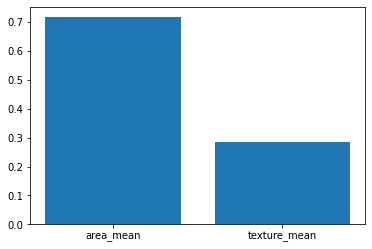

In [13]:
plt.bar(feature_importances.feature_nm, feature_importances.importances)
plt.show()

## RandomForestRegressor

In [15]:
car = pd.read_csv('./data/CarPrice_Assignment.csv')
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling','price']))
X=car_num[features]
y= car_num['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(143, 13) (62, 13)
(143,) (62,)


In [17]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
pred = reg.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc= reg.score(X_test, y_test)

print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}'.format(round(acc,3)))

MSE	4399842.355
MAE	1375.438
RMSE	2097.58
ACC	0.927


In [20]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,pd.DataFrame(importances)],axis=1)
feature_importances.columns=['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,boreratio,0.004643
1,carheight,0.003960
2,carlength,0.005322
3,carwidth,0.027219
4,citympg,0.006915
5,compressionratio,0.003536
6,curbweight,0.176253
7,enginesize,0.678743
8,highwaympg,0.047033
9,horsepower,0.025601


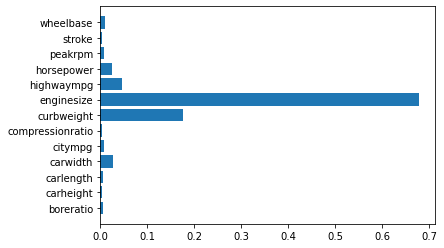

In [21]:
plt.barh(feature_importances.feature_nm, feature_importances.importances)
plt.show()

In [23]:
import pandas as pd
sky = pd.read_csv('./data/Skyserver.csv')
sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [24]:
sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

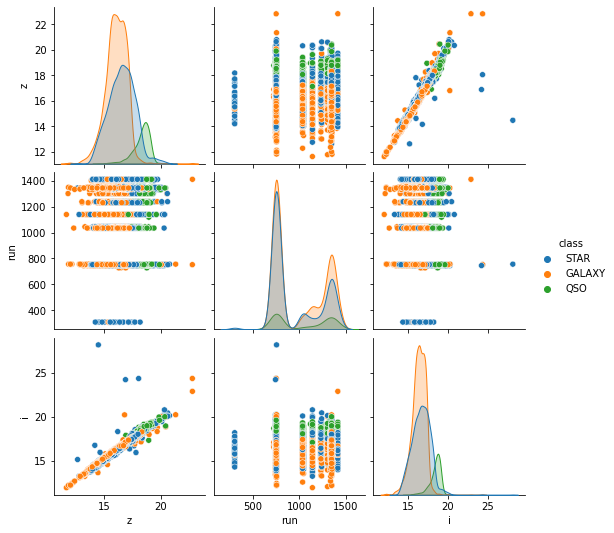

In [25]:
import seaborn as sns
sns.pairplot(hue='class',data=sky[['z','run','i','class']])

In [26]:
features = list(sky.columns)
features.remove('class')
X=sky[features]
y=sky['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7000, 17) (3000, 17)
(7000,) (3000,)


In [27]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
pred = clf.fit(X_train,y_train).predict(X_test)
print('Accuracy Score : ', clf.score(X_test,y_test))

Accuracy Score :  0.799


In [28]:
clf.predict_proba(X_test)[[0,13,68]]

array([[8.26737014e-01, 4.43137039e-02, 1.28949282e-01],
       [5.39851854e-05, 9.64092748e-02, 9.03536740e-01],
       [8.32868012e-01, 4.48282737e-02, 1.22303715e-01]])

In [29]:
clf.predict(X_test)[[0,13,68]]

array(['GALAXY', 'STAR', 'GALAXY'], dtype='<U6')

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82107\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
